In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Custom helper functions
from data_io import *
from utils import *

from sklearn.metrics import (precision_recall_curve, roc_curve, roc_auc_score,  auc)

In [2]:
# Loads ROC and PRC curve data, plots it and computes area under the curve metrics
def compute_curve_scores(path, plot=False):
    
    data = np.load(path, allow_pickle=True).item()
    
    out = {}
    for clf, data in data.items():
        
        fpr = data['fpr']
        tpr = data['tpr']
        precision = data['precision']
        recall = data['recall']
        
        roc_auc = auc(fpr, tpr)
        prc_auc = auc(recall, precision)
        
        out[clf] = {
            "roc_auc": roc_auc,
            "prc_auc": prc_auc
        }
        
        if not plot:
            
            print(f"Classifier {clf:20s} -> AuROC: {roc_auc:.2f}, AuPR: {prc_auc:.2f}")
            
        else:
            
            fig, axes = plt.subplots(1, 2, figsize=(8,4))
            
            fig.suptitle(f"Classifier: {clf:20s}")
            
            sns.lineplot(ax=axes[0], x=fpr, y=tpr)
            axes[0].set(xlabel='False Positive Rate (1-specificity)' + '\n\nROC AUC={:0.3f}'.format(roc_auc), ylabel='True Positive Rate (Recall)', title='ROC Curve')

            sns.lineplot(ax=axes[1], x=recall, y=precision)
            axes[1].set(xlabel='Recall'+ '\n\nPRC AUC={:0.3f}'.format(prc_auc), ylabel='Precision' , title='PR Curve')
            
            plt.show
            
    return out

## C. elegans

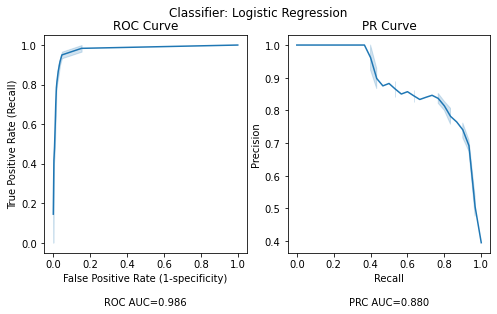

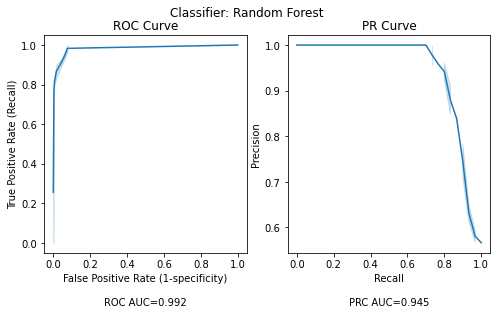

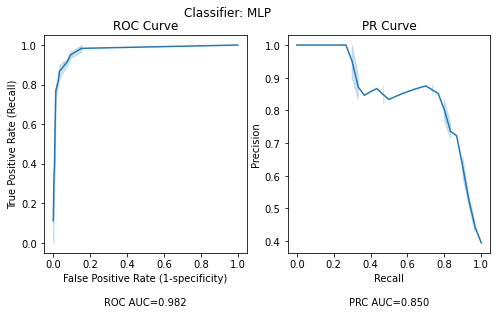

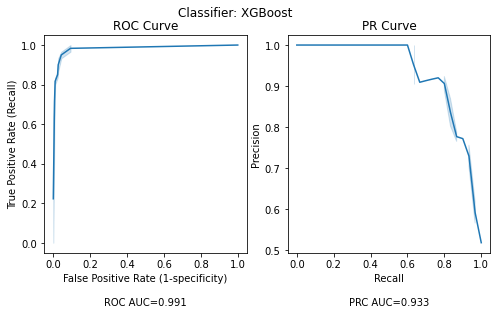

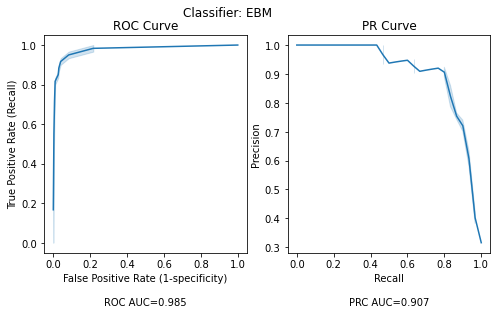

In [3]:
worm_curve_path = "./curves/curve_data_worm.npy"
worm_scores = compute_curve_scores(worm_curve_path, plot=True)

## Human

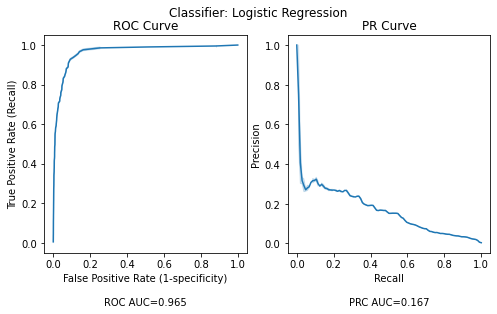

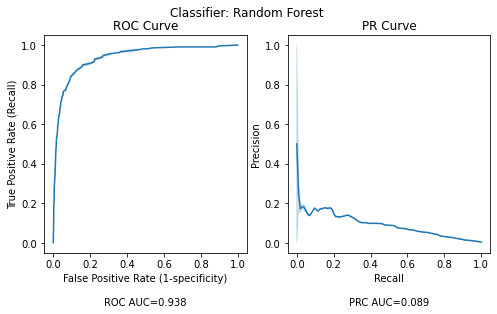

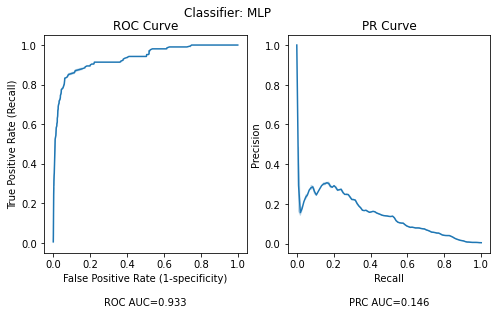

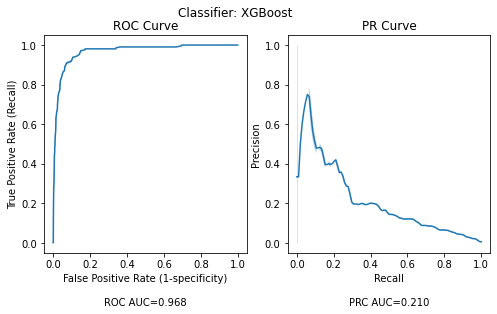

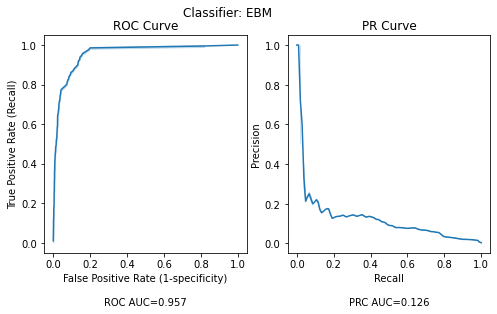

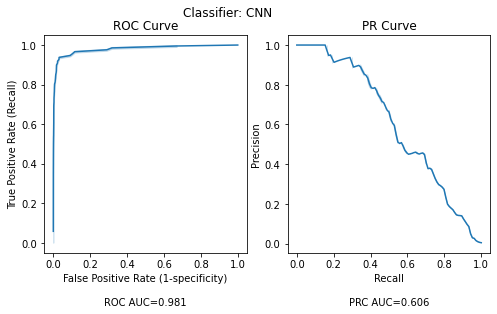

In [4]:
human_curve_path = "./curves/curve_data_human.npy"
human_scores = compute_curve_scores(human_curve_path, plot=True)